**Data source**: UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/27/credit+approval  

**The purpose of this project** is to use supervised learning techniques, logistic regression, to automate the credit card approval process for banks.

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

credit_app = pd.read_csv("credit_approval/crx.data", names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
credit_app.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [35]:
## Understanding the dataset
# credit_app['A4'].describe()
# credit_app['A5'].describe()
# credit_app.info()

## Preprocess the data

In [26]:
# save a copy of the original data before preprocessing it
credit_app_copy = credit_app

In [27]:
# impute missing values
credit_app.replace("?", np.nan, inplace=True)

for i in credit_app.columns:
    if credit_app[i].dtypes=="object":
        credit_app[i] = credit_app[i].fillna(credit_app[i].mode()[0])
    else:
        credit_app[i] = credit_app[i].fillna(credit_app[i].mean())

In [36]:
# One-hot encoding
column_list = ["A1", 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
oneHot_list = []
for i in column_list:
    column_x = pd.get_dummies(credit_app[i], prefix="column_" + str(i))
    oneHot_list.append(column_x)
    
oneHot_columns = pd.concat(oneHot_list, axis=1)

In [41]:
credit_app_prep = (
    pd.concat([credit_app, oneHot_columns], axis=1)
    [['column_A1_a', 'column_A1_b', 'A2', 'A3', 'column_A4_l', 'column_A4_u',
       'column_A4_y', 'column_A5_g', 'column_A5_gg', 'column_A5_p',
       'column_A6_aa', 'column_A6_c', 'column_A6_cc', 'column_A6_d',
       'column_A6_e', 'column_A6_ff', 'column_A6_i', 'column_A6_j',
       'column_A6_k', 'column_A6_m', 'column_A6_q', 'column_A6_r',
       'column_A6_w', 'column_A6_x', 'column_A7_bb', 'column_A7_dd',
       'column_A7_ff', 'column_A7_h', 'column_A7_j', 'column_A7_n',
       'column_A7_o', 'column_A7_v', 'column_A7_z', 'A8', 'column_A9_f',
       'column_A9_t', 'column_A10_f', 'column_A10_t', 'A11', 'column_A12_f',
       'column_A12_t', 'column_A13_g', 'column_A13_p', 'column_A13_s', 'A14', 'A15', 'A16']]
)
credit_app_prep.head()

,column_A1_a,column_A1_b,A2,A3,column_A4_l,column_A4_u,column_A4_y,column_A5_g,column_A5_gg,column_A5_p,...,column_A10_t,A11,column_A12_f,column_A12_t,column_A13_g,column_A13_p,column_A13_s,A14,A15,A16
0,0,1,30.83,0.000,0,1,0,1,0,0,...,1,1,1,0,1,0,0,00202,0,+
1,1,0,58.67,4.460,0,1,0,1,0,0,...,1,6,1,0,1,0,0,00043,560,+
2,1,0,24.50,0.500,0,1,0,1,0,0,...,0,0,1,0,1,0,0,00280,824,+
3,0,1,27.83,1.540,0,1,0,1,0,0,...,1,5,0,1,1,0,0,00100,3,+
4,0,1,20.17,5.625,0,1,0,1,0,0,...,0,0,1,0,0,0,1,00120,0,+


## Prepare the data for modeling

In [47]:
# Define target and features
credit_target = credit_app_prep.iloc[:,-1]
credit_features = credit_app_prep.iloc[:, :-1]

In [48]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(credit_features, credit_target, random_state=111, test_size=0.25, shuffle=True)

In [50]:
# Scaling the data
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Train the model

In [76]:
# build model and generate predictions
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_predicted = clf.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


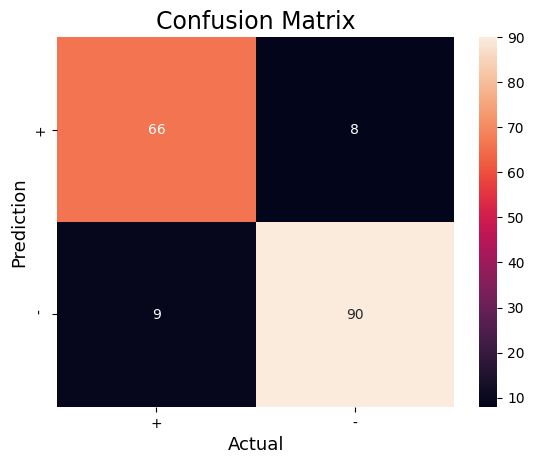

In [80]:
# evaluate predictions
cm = confusion_matrix(y_test, y_predicted)
sns.heatmap(
    cm,
    annot=True,
    fmt='g',
    xticklabels=['+', '-'],
    yticklabels=['+','-']
)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

As shown above, the model mispredicted 8 "approval (+)" cases as "non-approval (-)", and 9 "non-approval" cases as "approval", resulting in an overall accuracy rate of 90.1%. There is no dominant class, as both "approval" and "non-approval" classes gain precision rates of around 90%.

In [87]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           +       0.88      0.89      0.89        74
           -       0.92      0.91      0.91        99

    accuracy                           0.90       173
   macro avg       0.90      0.90      0.90       173
weighted avg       0.90      0.90      0.90       173



## Finding the best scoring model

In [88]:
parameters = {
    'penalty':[None, 'l2', 'l1', 'elasticnet'], 
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'C':[100, 10, 1, 0.1, 0.01]
}

In [91]:
clf_cv = GridSearchCV(estimator=clf, param_grid = parameters, cv=5)
clf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': [None, 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [92]:
clf_cv.best_estimator_

LogisticRegression(C=0.1, random_state=0)

In [93]:
best_score=clf_cv.best_estimator_.score(x_test, y_test)
best_score

0.9075144508670521

Therefore, after parameter tuning and cross validation, I built a model with the best accuracy score of 90.75%.